In [1]:
import pandas as pd
import os
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:
#результаты КТГ по мнению докторов
doctor_result_dict = {
    '1.txt': 'хорошее',
    '2.txt': 'хорошее',
    '3.txt': 'хорошее',
    '4.txt': 'хорошее',
    '5.txt': 'хорошее',
    '6.txt': 'хорошее',
    '7.txt': 'хорошее',
    '8.txt': 'хорошее',
    '9.txt': 'хорошее',
    '10.txt': 'хорошее',
    '11.txt': 'хорошее',
    '12.txt': 'хорошее',
    '13.txt': 'хорошее',
    '14.txt': 'хорошее',
    '15.txt': 'хорошее',
    '16.txt': 'хорошее',
    '17.txt': 'хорошее',
    '18.txt': 'хорошее',
    '19.txt': 'хорошее',
    '20.txt': 'хорошее',
    '21.txt': 'хорошее',
    '22.txt': 'хорошее',
    '23.txt': 'хорошее',
    '24.txt': 'хорошее',
    '25.txt': 'хорошее',
    '26.txt': 'хорошее',
    '27.txt': 'хорошее',
    '28.txt': 'хорошее',
    '29.txt': 'хорошее',
    '30.txt': 'хорошее',
    '31.txt': 'хорошее',
    '32.txt': 'хорошее',
    '33.txt': 'хорошее',
    '34.txt': 'хорошее',
    '35.txt': 'хорошее',
    '36.txt': 'хорошее',
    '37.txt': 'хорошее',
    '38.txt': 'хорошее',
    '39.txt': 'хорошее',
    '40.txt': 'хорошее',
    '41.txt': 'хорошее',
    '42.txt': 'хорошее',
    '43.txt': 'хорошее',
    '44.txt': 'хорошее',
    '45.txt': 'хорошее',
    '46.txt': 'хорошее',
    '47.txt': 'хорошее',
    '48.txt': 'хорошее',
    '49.txt': 'хорошее',
    '50.txt': 'хорошее',
    '51.txt': 'хорошее',
    '52.txt': 'хорошее',
    '53.txt': 'хорошее',
    '54.txt': 'хорошее',
    '55.txt': 'хорошее',
    '56.txt': 'хорошее',
    '57.txt': 'хорошее',
    '58.txt': 'хорошее',
    '59.txt': 'хорошее',
    '60.txt': 'хорошее',
    '61.txt': 'хорошее',
    '62.txt': 'хорошее',
    '63.txt': 'хорошее',
    '64.txt': 'хорошее',
    '65.txt': 'хорошее',
    '66.txt': 'хорошее',
    '67.txt': 'хорошее',
    '68.txt': 'хорошее',
    '69.txt': 'хорошее',
    '70.txt': 'хорошее',
    '71.txt': 'хорошее',
    '72.txt': 'хорошее',
    '73.txt': 'хорошее',
    '74.txt': 'хорошее',
    '75.txt': 'хорошее',
    '76.txt': 'плохое',
    '77.txt': 'плохое',
    '78.txt': 'плохое',
    '79.txt': 'плохое',
    '80.txt': 'плохое',
    '81.txt': 'плохое',
    '82.txt': 'плохое',
    '83.txt': 'плохое',
    '84.txt': 'плохое',
    '85.txt': 'плохое',
    '86.txt': 'плохое',
    '87.txt': 'плохое',
    '88.txt': 'плохое',
    '89.txt': 'плохое',
    '90.txt': 'плохое',
    '91.txt': 'плохое',
    '92.txt': 'плохое',
    '93.txt': 'плохое',
    '94.txt': 'плохое',
    '95.txt': 'плохое',
    '96.txt': 'плохое',
    '97.txt': 'плохое',
    '98.txt': 'плохое',
    '99.txt': 'плохое',
    '100.txt': 'плохое',
}

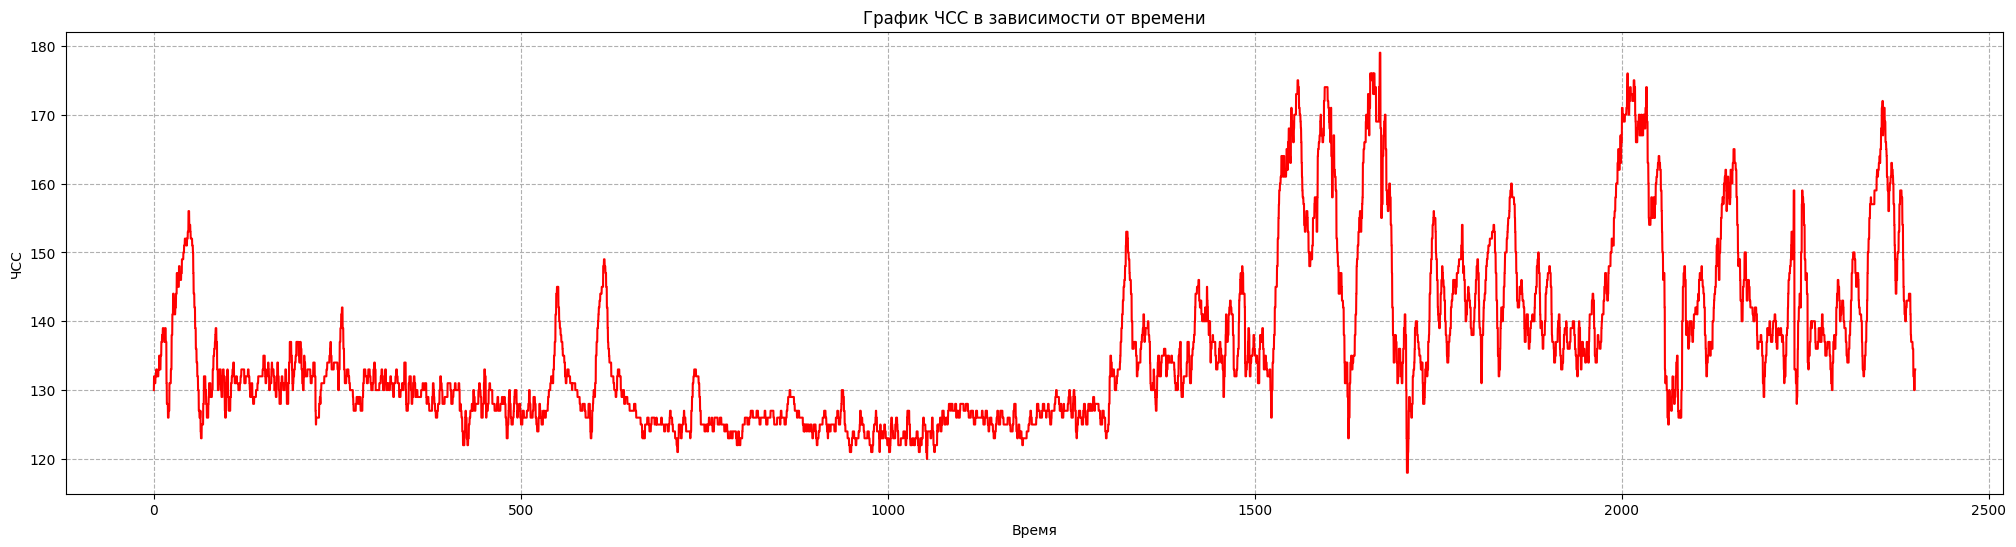

In [3]:
#код на случай, если понадобится визуализация
os.chdir(r'C:\Users\пк\Desktop\ЦК практика\ctg_files') #устанавливаю рабочую директорию

with open('1.txt', 'r') as file:
    graph_list = ast.literal_eval(file.read())
x_coords = [i.get('Key') for i in graph_list]
y_coords = [i.get('Value') for i in graph_list]
df_all_coords = pd.DataFrame.from_dict({'Время': x_coords, 'ЧСС': y_coords, })
pd.set_option('display.max_rows', 10)

plt.figure(figsize = (25, 6))
plt.plot(df_all_coords['Время'], df_all_coords['ЧСС'], color = 'r')
plt.grid(True, linestyle = '--')
plt.xlabel('Время')
plt.ylabel('ЧСС')
plt.title('График ЧСС в зависимости от времени')
plt.show()

In [4]:
#функция, читающая файлы
def read_file(num):
    os.chdir(r'C:\Users\пк\Desktop\ЦК практика\ctg_files')
    filename = str(num) + '.txt'
    with open(filename, 'r') as file:
        graph_list = ast.literal_eval(file.read())
    x_coords = [i.get('Key') for i in graph_list]
    y_coords = [i.get('Value') for i in graph_list]
    df_all_coords = pd.DataFrame.from_dict({'Время': x_coords, 'ЧСС': y_coords, })
    return df_all_coords

In [5]:
#функция для построения целевой колонки итогового датафрейма
def get_doctor_res(num):
    return doctor_result_dict[str(num) + '.txt']

In [6]:
#вычисляю базальный ритм
bazalny_ritm = []

for i in range(1, 101):
    df = read_file(i)
    mean_chss = df['ЧСС'].mean() #базальный ритм
    bazalny_ritm.append(round(float(mean_chss)))

In [7]:
#вычисляю амплитуду осцилляций и частоту осцилляций
amplituda_occiliation = []
chastota_occiliation = []

for i in range(1, 101):
    df = read_file(i)
    try:
        threshold = 15
        time_interval = 60

        list_for_amplitude = []

        for index, row in df.iterrows():
            if index == 0:
                total_time = row['Время']
            else:
                time_diff = row['Время'] - df.loc[index - 1, 'Время']
                total_time = total_time + time_diff
    
            if row['ЧСС'] <= (mean_chss + threshold) and row['ЧСС'] >= (mean_chss - threshold):
                if total_time <= time_interval:
                    list_for_amplitude.append(float(row['ЧСС']))
                else:
                    break
            else:
                total_time = 0
                list_for_amplitude.clear()

        amplitude = max(list_for_amplitude) - min(list_for_amplitude) #амплитуда осцилляций
        amplituda_occiliation.append(amplitude) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! второй столбец

        mean_amplitude = sum(list_for_amplitude) / len(list_for_amplitude)
        occ = [round(x - mean_amplitude) for x in list_for_amplitude] #отклонения от среднего значения
        total_count_occ = [i for i in occ if i > 5 or i < -5] #отклонения больше 5 по модулю (осцилляция)
        chastota_occiliation.append(len(total_count_occ))
    
    except Exception as e:
        print(f"Ошибка на итерации {i}: {e}")
        amplituda_occiliation.append(0)
        chastota_occiliation.append(0)

Ошибка на итерации 32: max() arg is an empty sequence
Ошибка на итерации 86: max() arg is an empty sequence
Ошибка на итерации 92: max() arg is an empty sequence
Ошибка на итерации 97: max() arg is an empty sequence
Ошибка на итерации 99: max() arg is an empty sequence


In [8]:
#вычисляю число акцелераций
acceleration = []

for i in range(1, 101):
    df = read_file(i)
    #считаю акцелерации
    time_interval_acceleration = 10

    list_for_acceleration = []
    current_acceleration = []

    for index, row in df.iterrows():
    
        if index == 0:
            total_time = row['Время']
        else:
            time_diff = row['Время'] - df.loc[index - 1, 'Время']
            total_time = total_time + time_diff

        if row['ЧСС'] > (mean_chss + threshold):
            current_acceleration.append(float(row['ЧСС']))
        else:
            if total_time >= time_interval_acceleration:
                list_for_acceleration.append(current_acceleration)
                total_time = 0
            else:
                current_acceleration = []
                total_time = 0

    acceleration.append(len(list_for_acceleration)) #!!!!!!!!!!!!!!!!!!!!! 4 столбец

In [9]:
#считаю число децелераций
deceleration = []

for i in range(1, 101):
    df = read_file(i)
    #считаю децелерации
    time_interval_deceleration = 10

    list_for_deceleration = []
    current_deceleration = []

    for index, row in df.iterrows():
    
        if index == 0:
            total_time = row['Время']
        else:
            time_diff = row['Время'] - df.loc[index - 1, 'Время']
            total_time = total_time + time_diff

        if row['ЧСС'] < (mean_chss - threshold):
            current_deceleration.append(float(row['ЧСС']))
        else:
            if total_time >= time_interval_deceleration:
                list_for_deceleration.append(current_deceleration)
                total_time = 0
            else:
                current_deceleration = []
                total_time = 0

    deceleration.append(len(list_for_deceleration)) #!!!!!!!!!!!!!! 5 столбец

In [10]:
data = pd.DataFrame.from_dict({'Базальный ритм' : bazalny_ritm, 'Амплитуда осцилляций' : amplituda_occiliation, 'Частота осцилляций' : chastota_occiliation, 'Акцелерации' : acceleration, 'Децелерации' : deceleration})

In [11]:
data['num'] = range(1, len(data) + 1)
data['doctor_result'] = data['num'].apply(get_doctor_res).map({'хорошее': 1, 'плохое': 0})

In [12]:
data.drop('num', axis = 1, inplace = True)
print(data)

    Базальный ритм  Амплитуда осцилляций  Частота осцилляций  Акцелерации  \
0              136                  28.0                  56            7   
1              129                  26.0                  80            4   
2              129                  27.0                 102            6   
3              131                   8.0                   0            4   
4              136                  12.0                  20            1   
..             ...                   ...                 ...          ...   
95             130                  14.0                  20            5   
96             116                   0.0                   0            0   
97             126                  21.0                  88            1   
98             115                   0.0                   0            3   
99             137                  12.0                  26            7   

    Децелерации  doctor_result  
0             0              1  
1        

In [13]:
data.rename({'doctor_result':'Решение докторов'}, inplace = True)

In [63]:
#обучение модели

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True )

# Предобработка
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# обучение модели
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [64]:
# Оценка качества модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9


In [71]:
# Функция предсказания
def predict_plod(CHSS, amplitude, freq, num_acc, num_dec):
    # Масштабируем входные данные
    scaled_input = scaler.transform([[CHSS, amplitude, freq, num_acc, num_dec]])
    pred = clf.predict(scaled_input)
    return pred[0]  # Возвращаем предсказание

result = predict_plod(120, 25, 15, 15, 0)
if result == 1:
  print('Хороший')
else:
  print('Плохой')

Хороший


C:\Users\пк\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


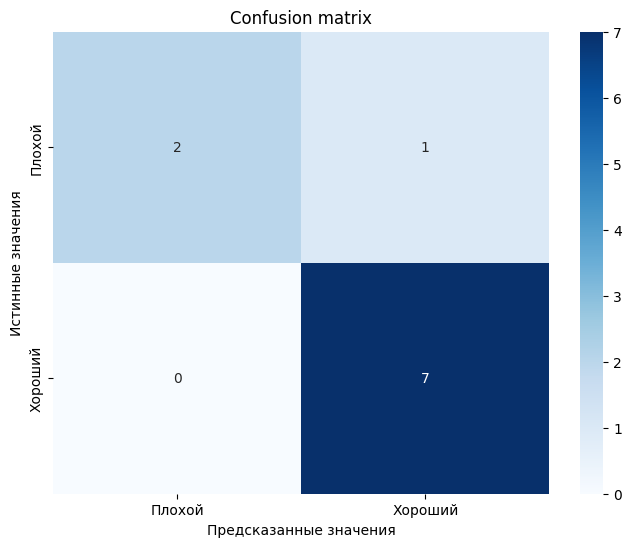

In [72]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Плохой', 'Хороший'], yticklabels=['Плохой', 'Хороший'])
plt.title('Confusion matrix')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

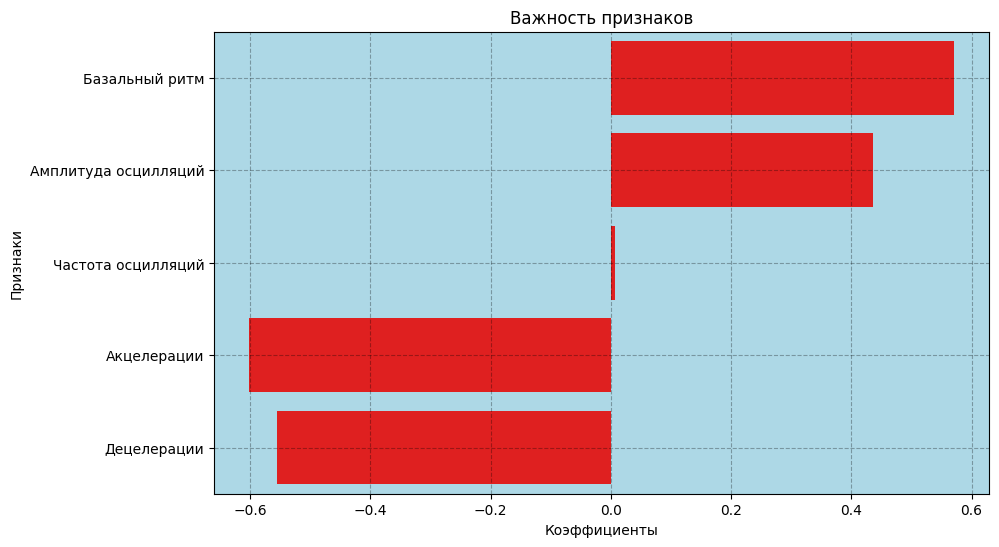

In [73]:
# Важность признаков (для логистической регрессии)
importance = clf.coef_[0]
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names, color = 'red')
plt.gca().set_facecolor('lightblue')
plt.title('Важность признаков')
plt.xlabel('Коэффициенты')
plt.ylabel('Признаки')
plt.grid(True, color = 'black', alpha = 0.3, linestyle = '--')
plt.show()